In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict




## 1. Likelihood methods and identifiability 


### 1.1 $\mathcal{L}(\hat{\theta})$ plots


When we do parameter estimation using either (a) Nested sampling (c.f. Bilby) or (b) expectation maximisation we want to try to maximise the likelihood.

When we run the Kalman filter for a particular set of parameters it returns a likelihood $\mathcal{L}(\hat{\theta}) = \text{KF}(\hat{\theta})$ 

For each of our parameters, what does the $\mathcal{L}(\hat{\theta})$ curve look like (holding other parameters constant)?

In [7]:
from plotting import likelihoods_over_priors,iterate_over_priors
import numpy as np 

#Set everything up
P   = SystemParameters()   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)

Optimal likelihood is:  519898.4482687315


In [4]:
import matplotlib.pyplot as plt 
def plot_likelihood(x,y,logscale,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)


    ax.plot(x,y)

    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

    #ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel("parameter")
    ax.set_ylabel("likelihood")

    plt.show()

### Omega


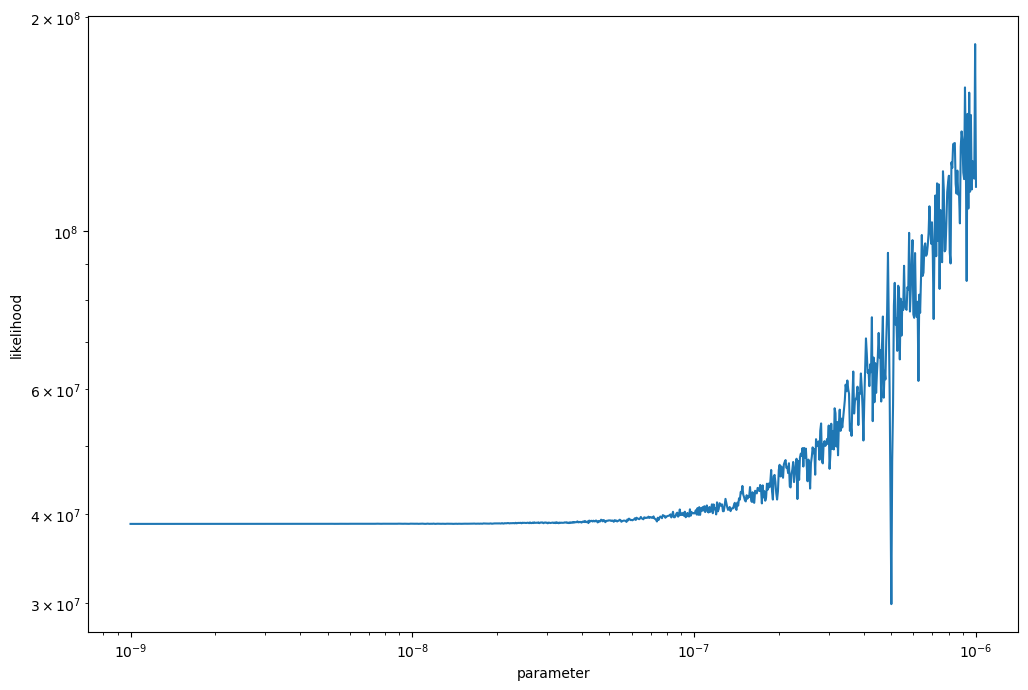

In [8]:
import numpy as np 
variable = "omega_gw"
variable_range = np.logspace(-9,-6,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

### Phi0

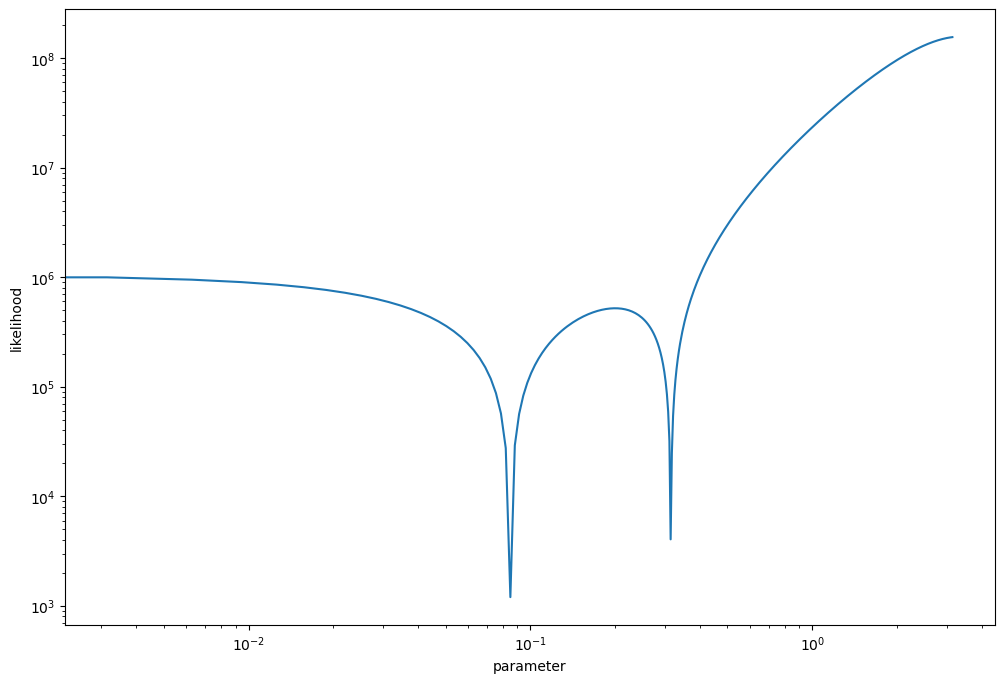

In [9]:

variable = "phi0_gw"
variable_range = np.linspace(0,np.pi,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

### Delta

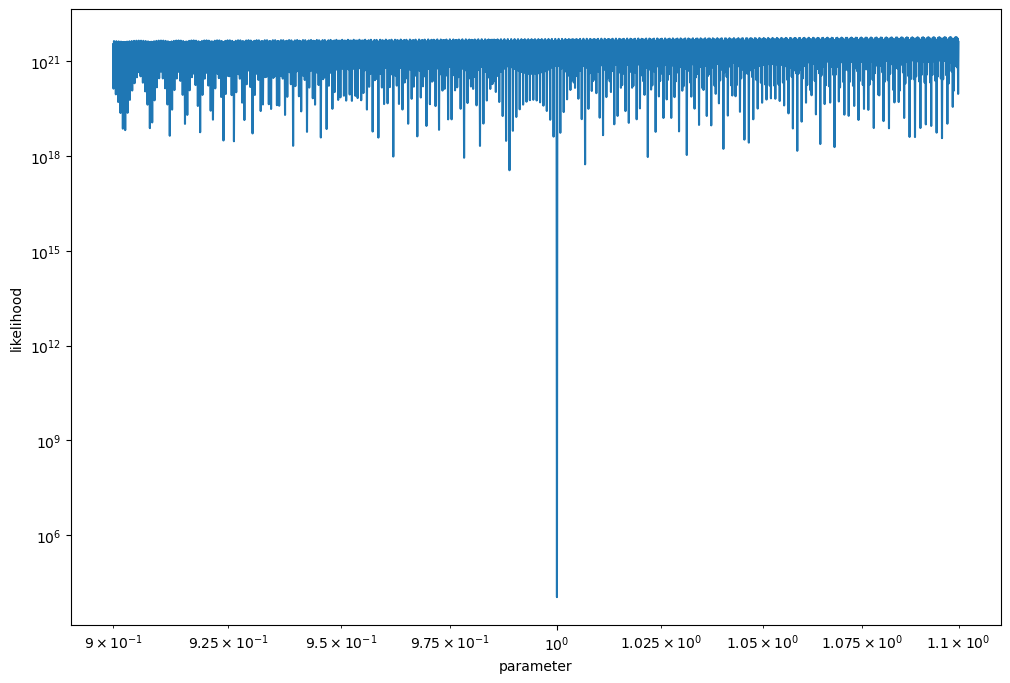

In [14]:

variable = "delta_gw"
variable_range = np.arange(0.9,1.1,0.0001)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

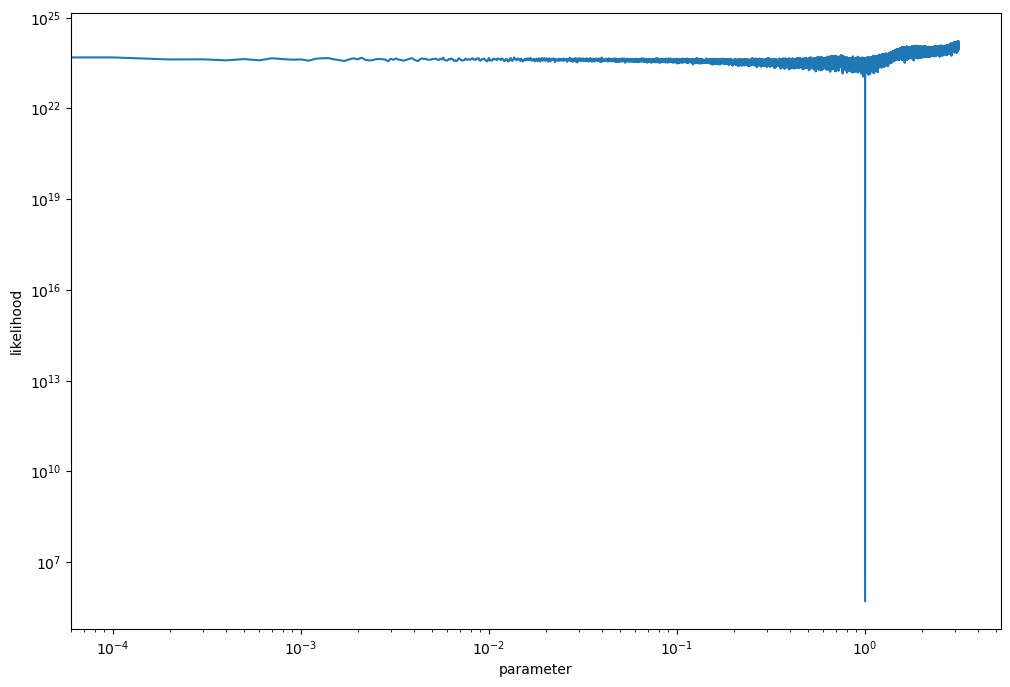

In [7]:

variable = "delta_gw"
variable_range = np.arange(0.0,np.pi,0.0001)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

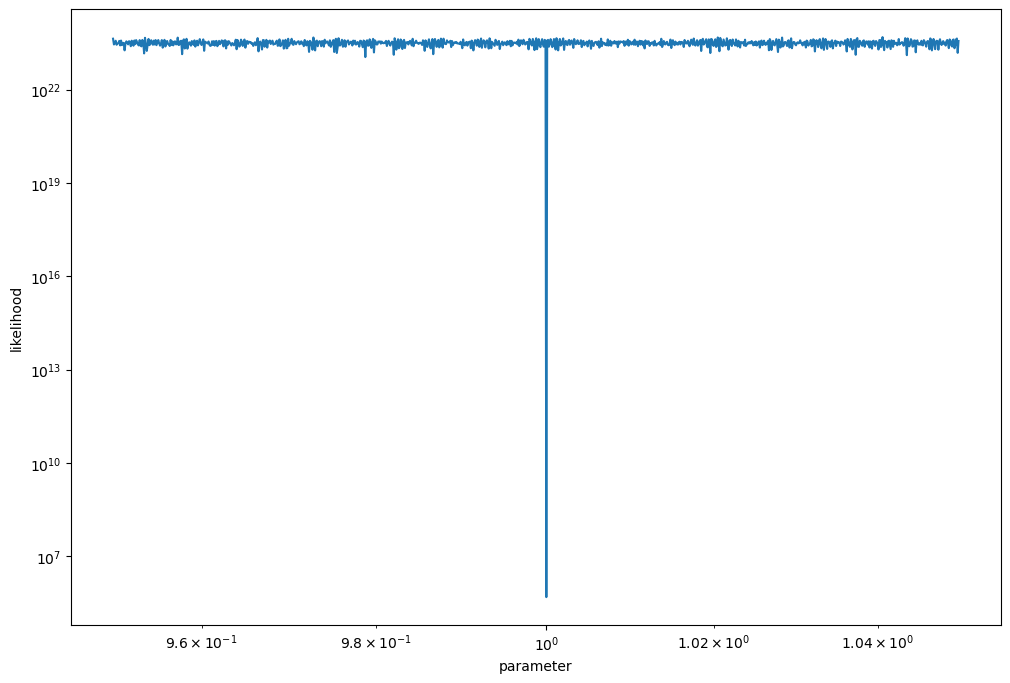

In [11]:

variable = "delta_gw"
variable_range = np.arange(0.95,1.05,0.0001)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

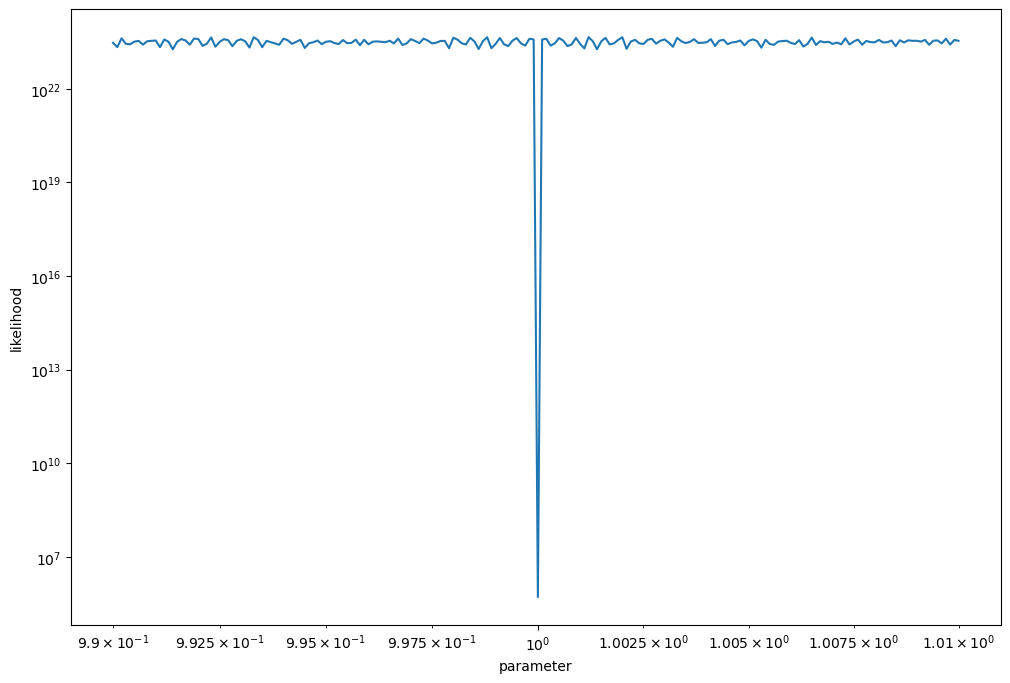

In [12]:

variable = "delta_gw"
variable_range = np.arange(0.99,1.01,0.0001)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

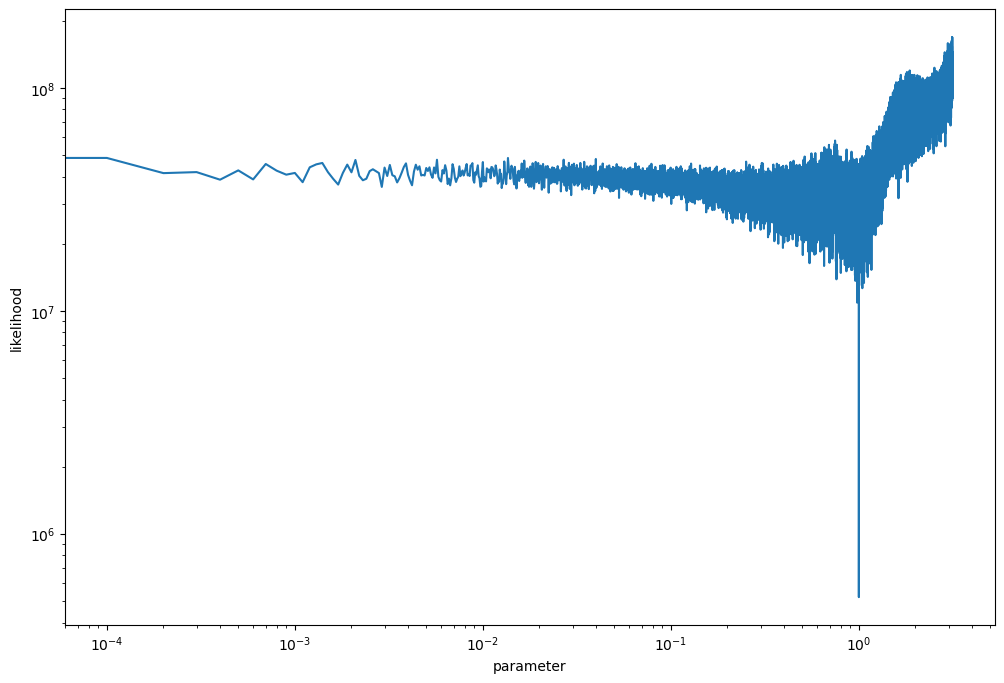

In [10]:

variable = "delta_gw"
variable_range = np.arange(0.0,np.pi,0.0001)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

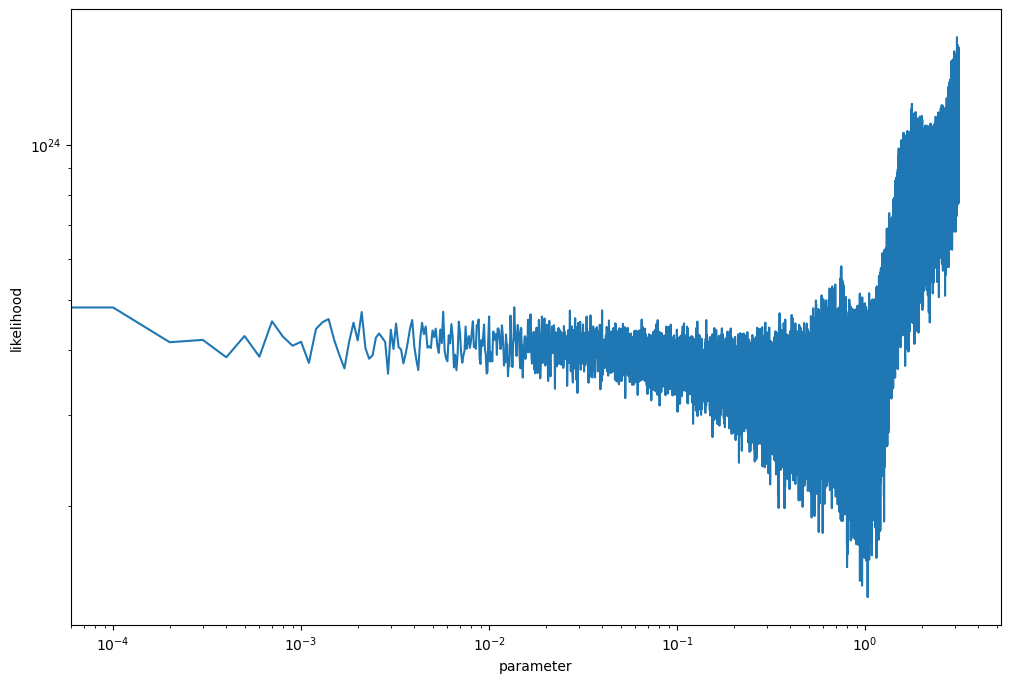

In [9]:
variable = "delta_gw"
variable_range = np.linspace(0.0,np.pi,31416)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

### Alpha

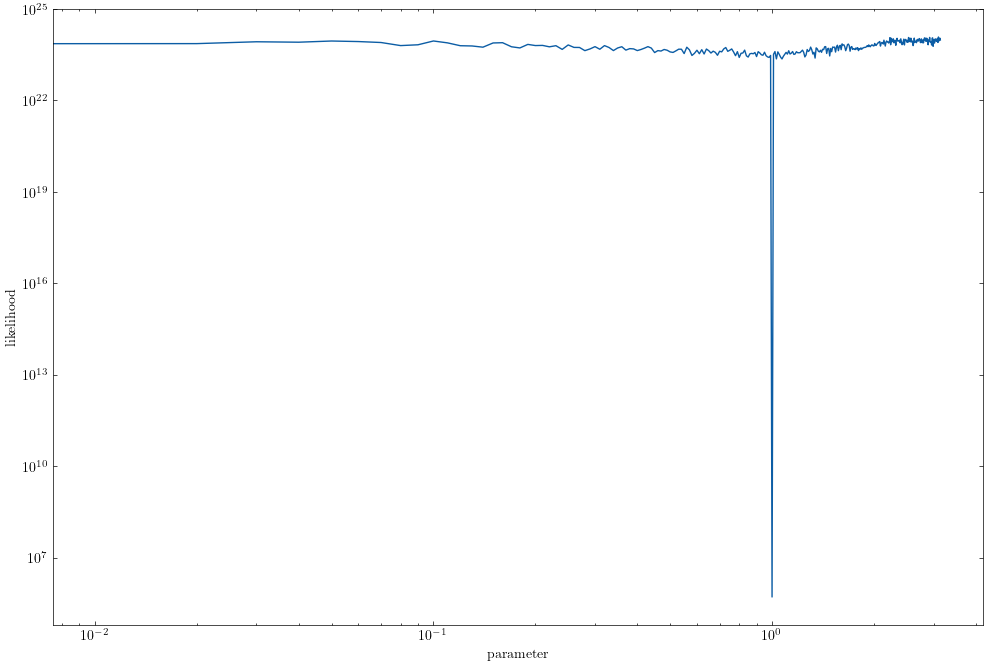

In [18]:
variable = "alpha_gw"
variable_range = np.arange(0.0,np.pi,0.01)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

### Strain

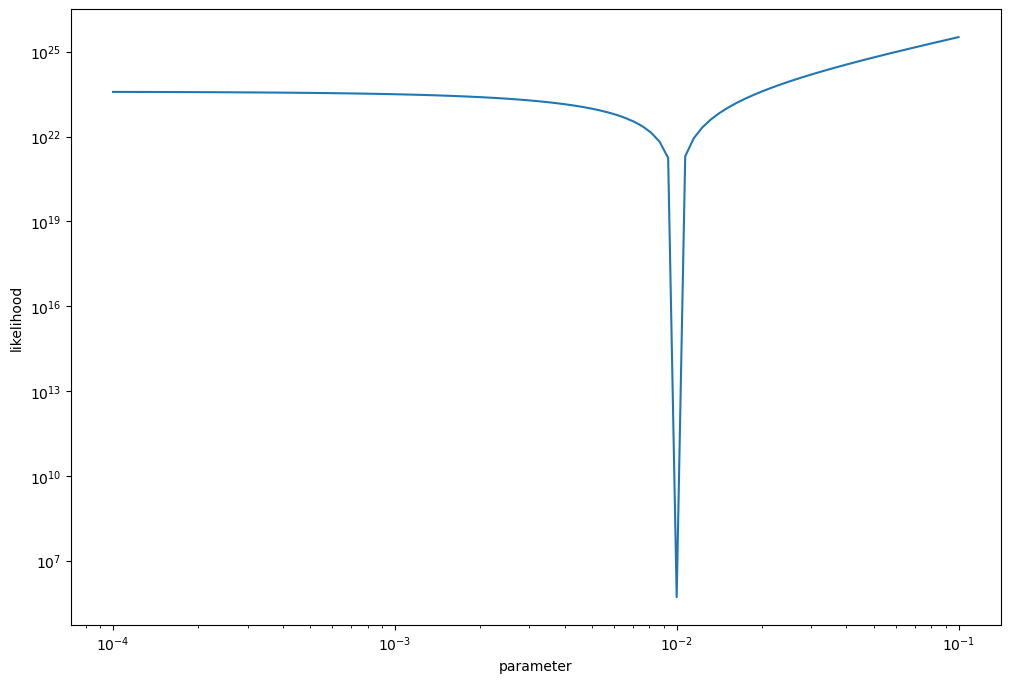

In [13]:
variable = "h"
variable_range = np.logspace(-4,-1,100)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

In [8]:
len(variable_range)

31416

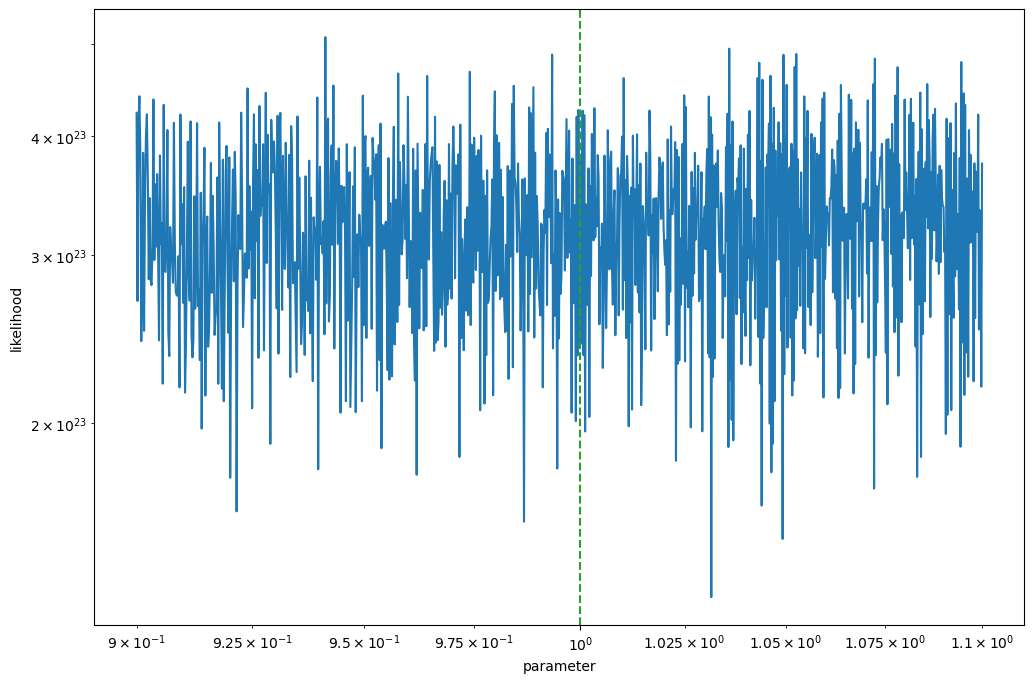

In [8]:

variable = "delta_gw"
variable_range = np.linspace(0.9,1.1,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

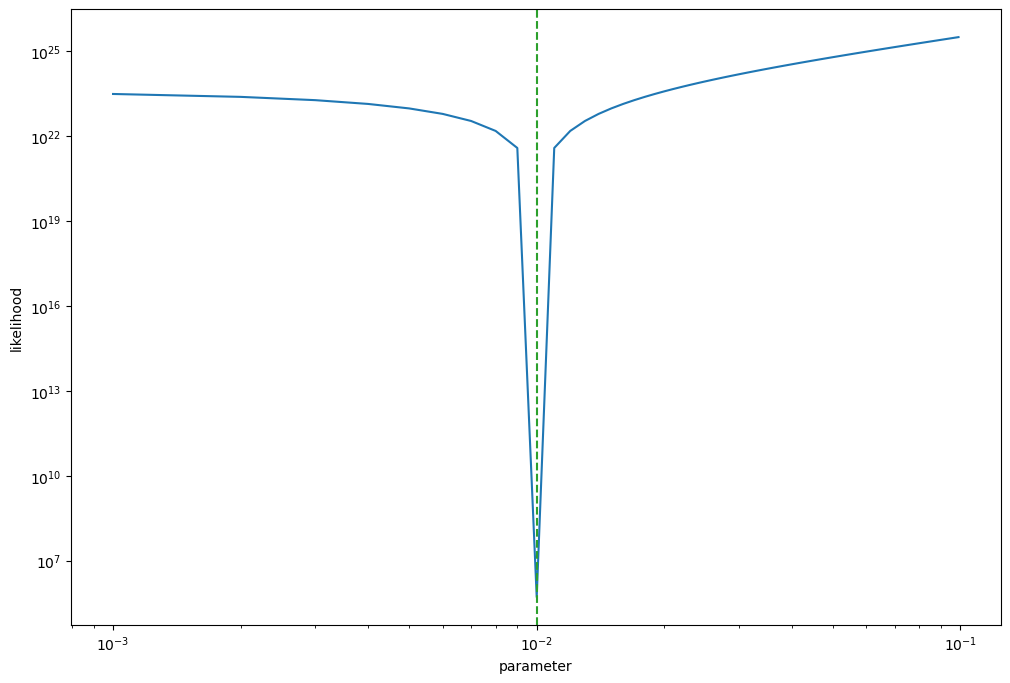

In [16]:

variable = "h"
variable_range = np.arange(1e-3,1e-1,1e-3)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

### Distance

In [148]:

from plotting import likelihoods_over_priors,iterate_over_priors
import numpy as np 

#Set everything up
P   = SystemParameters(Npsr=0)   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)




variable = "distance0"
vv = true_parameters["distance0"]

variable_range = np.linspace(vv*0.9,vv*1.1,int(1000))
small_var_range = np.arange(vv-10,vv+10,1) #dont over step the true likelihood

selected_parameters = true_parameters.copy()

likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
new_likelihoods = iterate_over_priors(variable, small_var_range,selected_parameters,KF)


Optimal likelihood is:  519276.73334892053


11031.030034720068


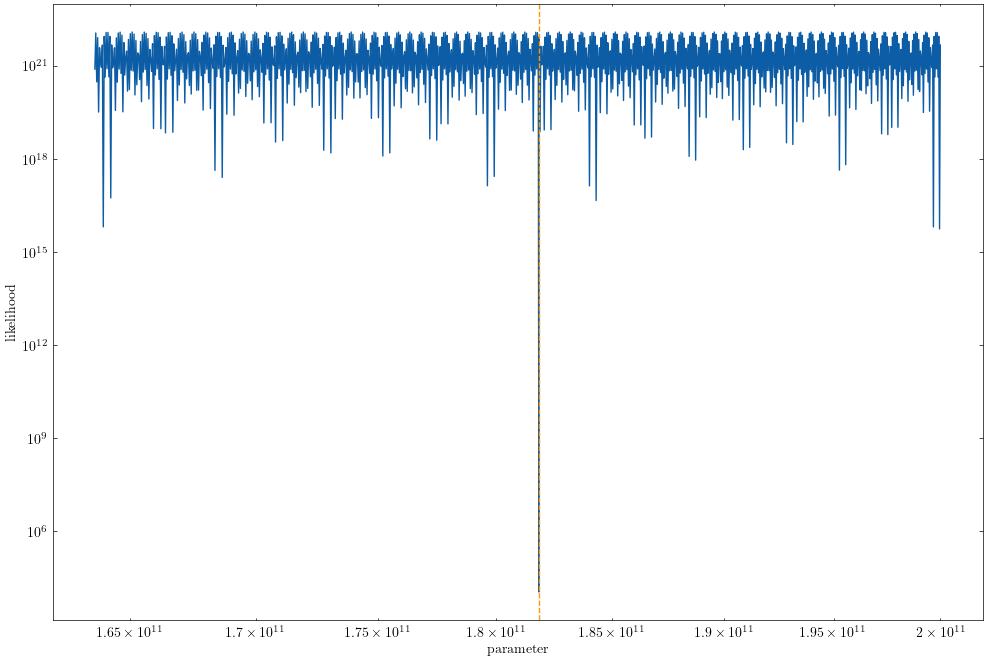

In [147]:
def plot_likelihood2(x,y,logscale,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)


    
    z = [x for _, x in sorted(zip(x, y))]

    ax.plot(sorted(x),z)

    print(np.min(z))

    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel("parameter")
    ax.set_ylabel("likelihood")





    plt.show()









xx = np.append(variable_range,small_var_range)
yy = np.append(likelihoods,new_likelihoods)


plot_likelihood2(xx,yy,True,true_parameters[variable])

519276.73334892053


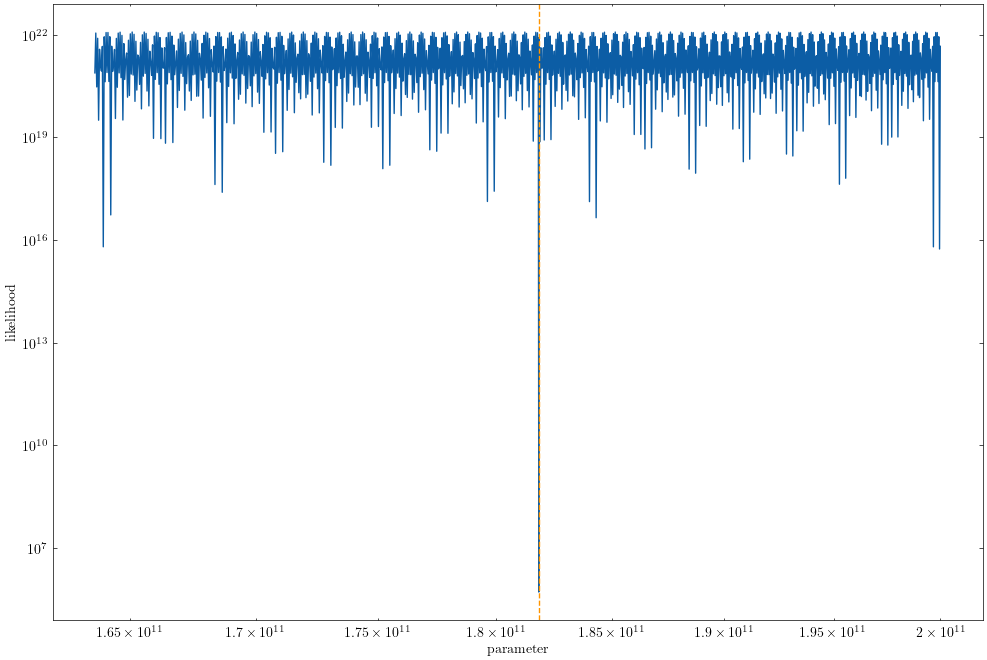

In [149]:
def plot_likelihood2(x,y,logscale,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)


    
    z = [x for _, x in sorted(zip(x, y))]

    ax.plot(sorted(x),z)

    print(np.min(z))

    if logscale:
        ax.set_xscale('log')
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel("parameter")
    ax.set_ylabel("likelihood")





    plt.show()









xx = np.append(variable_range,small_var_range)
yy = np.append(likelihoods,new_likelihoods)


plot_likelihood2(xx,yy,True,true_parameters[variable])

### All parameters

likelihoods_over_priors
0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 0.01
7 f00 327.8470205611185
8 fdot0 -1.227834e-15
9 gamma0 1e-13
10 distance0 181816860005.41092


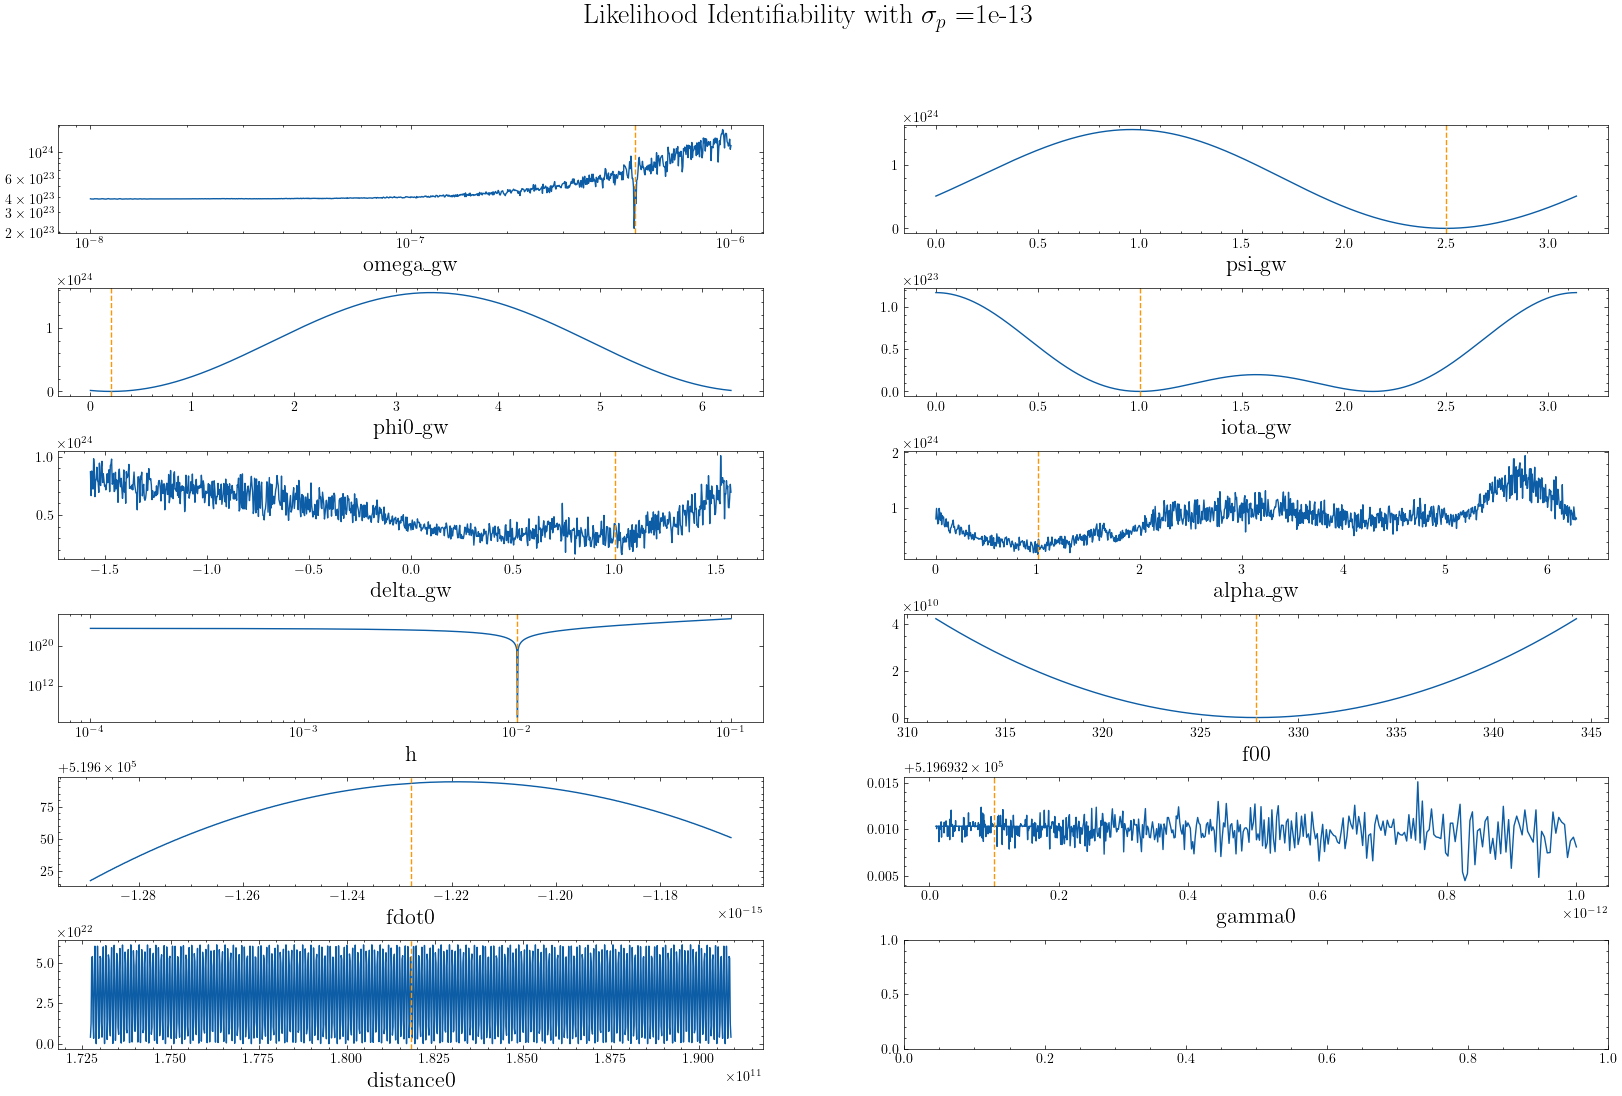

In [16]:
selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,np.pi,nsamples), #iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),        #delta
          np.linspace(0,2*np.pi,nsamples),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])


In [ ]:
selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,np.pi,nsamples), #iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),        #delta
          np.linspace(0,2*np.pi,nsamples),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])


likelihoods_over_priors
0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 0.01
7 f00 327.8470205611185
8 fdot0 -1.227834e-15
9 gamma0 1e-13
10 distance0 181816860005.41092


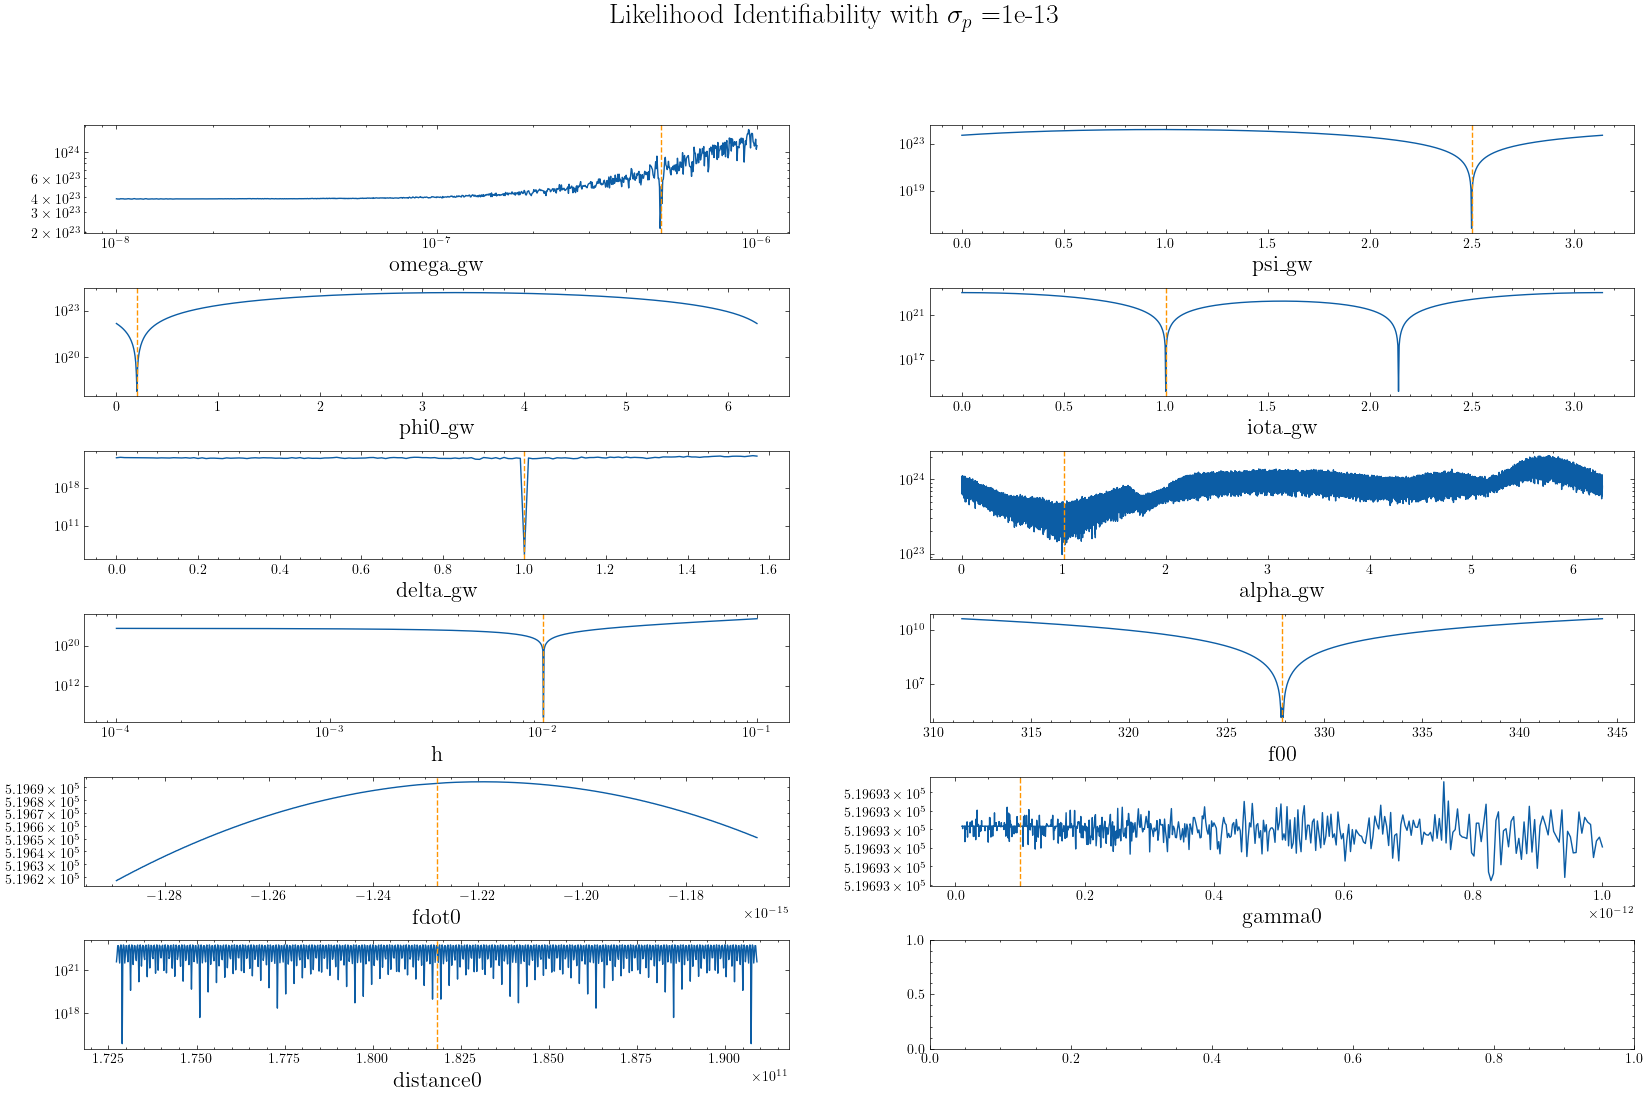

In [21]:
selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,np.pi,nsamples), #iota
          np.arange(0.0,np.pi/2.0,0.01),        #delta
          np.linspace(0,2*np.pi,nsamples*100),#alpha #          np.arange(0,2*np.pi,0.01),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])


likelihoods_over_priors
0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 0.01
7 f00 327.8470205611185
8 fdot0 -1.227834e-15
9 gamma0 1e-13
10 distance0 181816860005.41092


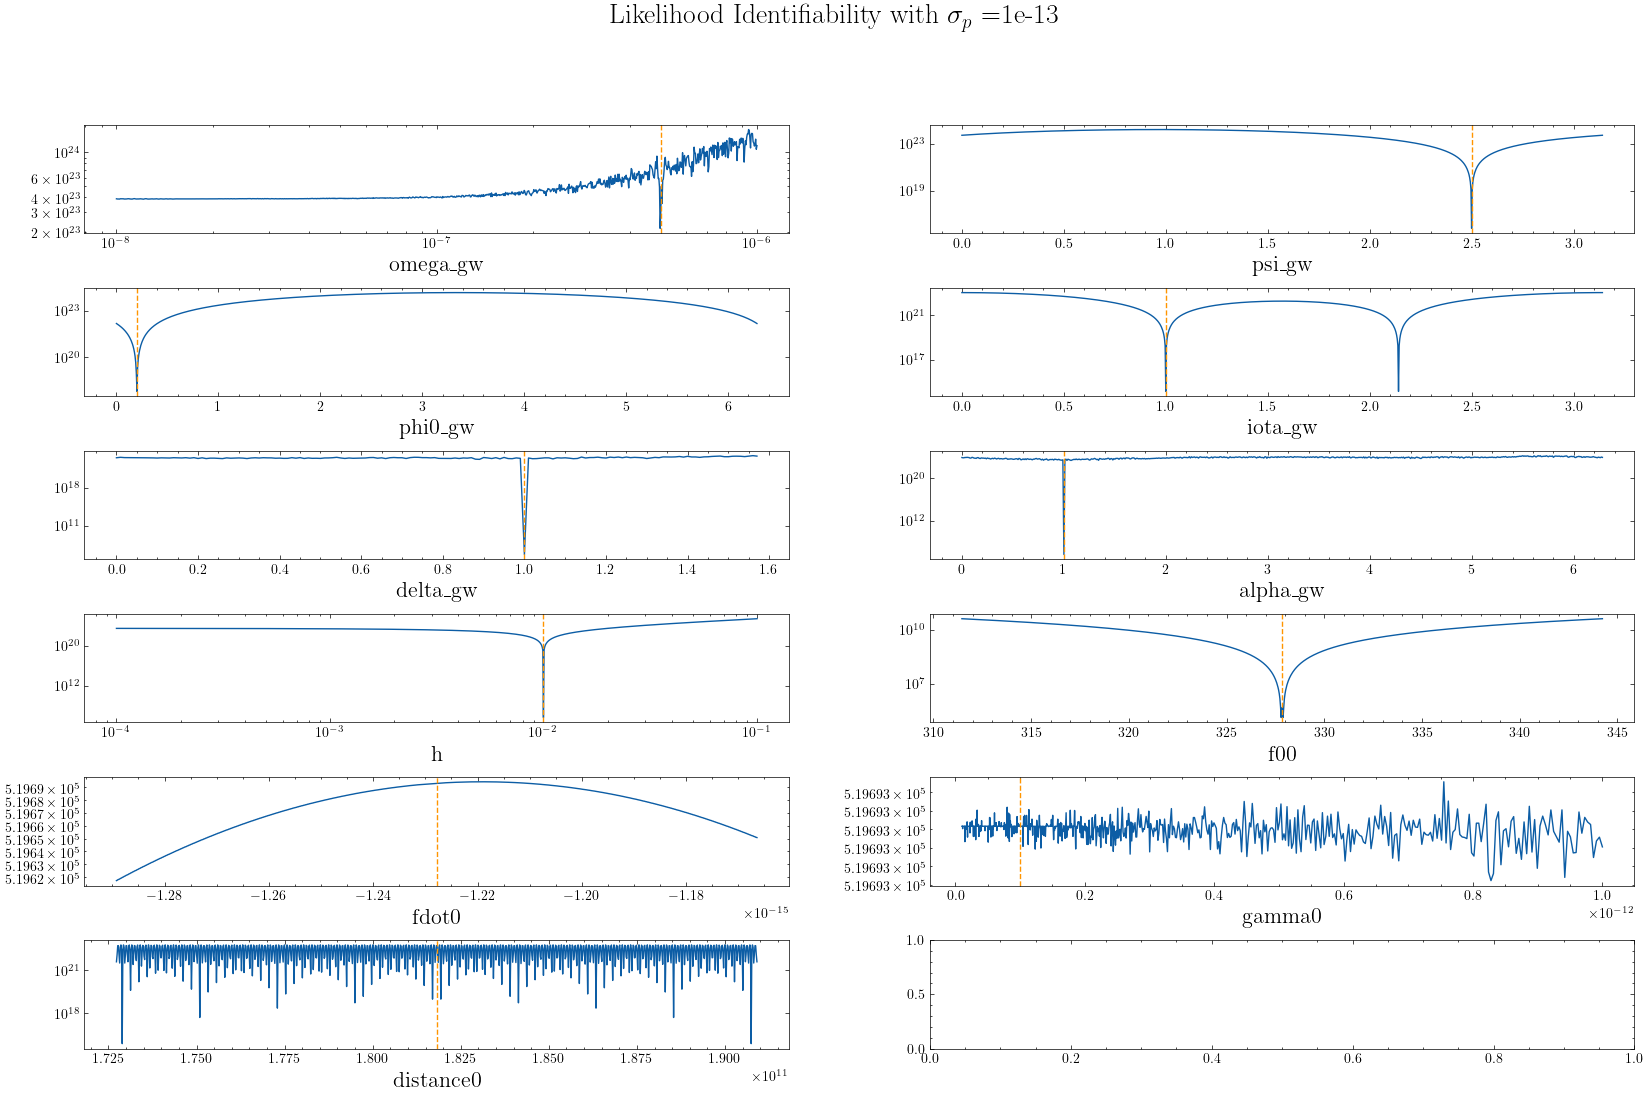

In [22]:
selected_parameters = ["omega_gw","psi_gw","phi0_gw","iota_gw","delta_gw","alpha_gw","h","f00","fdot0","gamma0","distance0"]
parameters_dict = {k: true_parameters[k] for k in selected_parameters}


nsamples = int(1e3)
priors = [np.logspace(-8,-6,nsamples),    #omega
          np.linspace(0,np.pi,nsamples),#psi
          np.linspace(0,2*np.pi,nsamples),#phi0
          np.linspace(0,np.pi,nsamples), #iota
          np.arange(0.0,np.pi/2.0,0.01),        #delta
          np.arange(0,2*np.pi,0.01),#alpha
          np.logspace(-4,-1,nsamples), #h
          np.linspace(true_parameters["f00"]*0.95,true_parameters["f00"]*1.05, nsamples), #f0
          np.linspace(true_parameters["fdot0"]*1.05,true_parameters["fdot0"]*0.95, nsamples), #fdot0
          np.logspace(-12,-14,nsamples), #gamma0
          np.linspace(true_parameters["distance0"]*0.95,true_parameters["distance0"]*1.05, nsamples), #distance0
]


likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,sigma_p=P["sigma_p"])


### Contour plots

Lets go to 2 dimensions:

In [172]:
import numpy as np
def likelihood_surface(param_name_1, param_name_2, range_1,range_2,savefile):

    #Setup
    P    = SystemParameters(h=1e-12)       #define the system parameters as a class
    PTA  = Pulsars(P)               #setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    #Define the model 
    model = LinearModel

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)


    #Iterate
    #deltas = np.linspace(-np.pi/2,np.pi/2,200)
    #omegas = np.logspace(-9,-6,200)
    likelihoods = np.zeros((len(range_1),len(range_2)))

    for i in range(len(range_1)):
        for j in range(len(range_2)):

            p1 = range_1[i]
            p2 = range_2[j]

            true_parameters = priors_dict(PTA,P)
            true_parameters[param_name_1] = p1
            true_parameters[param_name_2] = p2


            model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
            
            likelihoods[i,j] = model_likelihood

            #print(p1,p2,model_likelihood)



    d = {}
    d[param_name_1] = range_1
    d[param_name_2] = range_2
    d['likelihood'] = likelihoods

    np.savez(savefile,**d)

In [173]:
#Alpha vs delta
param_1 = "alpha_gw"
param_2 = "delta_gw"

range_1 = np.arange(0,2*np.pi,0.10)
range_2 = np.arange(0,2*np.pi,0.10)


savefile = f"../data/{param_1}_{param_2}_surface_data2"

likelihood_surface(param_1, param_2, range_1,range_2,savefile)


In [174]:
#iota vs phi0
param_1 = "iota_gw"
param_2 = "phi0_gw"

range_1 = np.arange(0,np.pi,0.10)
range_2 = np.arange(0,np.pi,0.10)


savefile = f"../data/{param_1}_{param_2}_surface_data2"

likelihood_surface(param_1, param_2, range_1,range_2,savefile)

In [175]:
#omega vs delta
param_1 = "omega_gw"
param_2 = "delta_gw"

#range_1 = np.logspace(-9,-6,20)
range_1 = np.arange(1e-8,1e-6,1e-8)
range_2 = np.arange(0,np.pi,0.1)


savefile = f"../data/{param_1}_{param_2}_surface_data2"

likelihood_surface(param_1, param_2, range_1,range_2,savefile)

See `likelihood_surface.py` e.g. `python likelihood_surface.py iota_gw phi0_gw 1.0 0.20`

Contour plots are not that useful:

In [89]:
def contour_plot(p1,p2):



    container = np.load(f"../data/{p1}_{p2}_surface_data2.npz")


    data_dict = {name: container[name] for name in container}

    y = data_dict[p1]
    x = data_dict[p2]
    z = np.log10(np.abs(data_dict["likelihood"]))
    z = data_dict["likelihood"]

    Y,X = np.meshgrid(y,x)
    Z = z


    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.contour(X, Y, Z.T, cmap='viridis', alpha=0.6)

    plt.show()

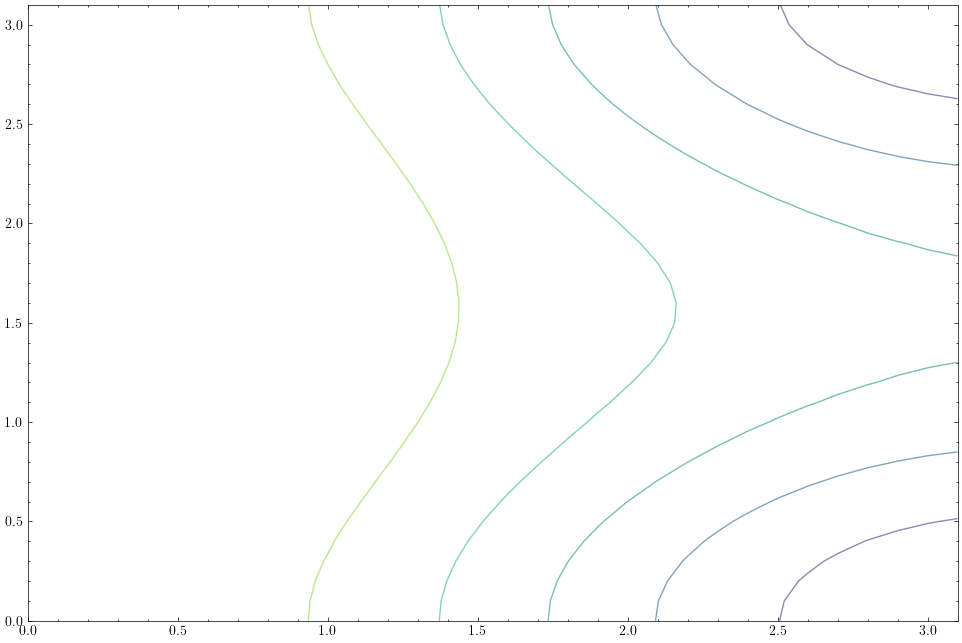

In [90]:
contour_plot("iota_gw", "phi0_gw")

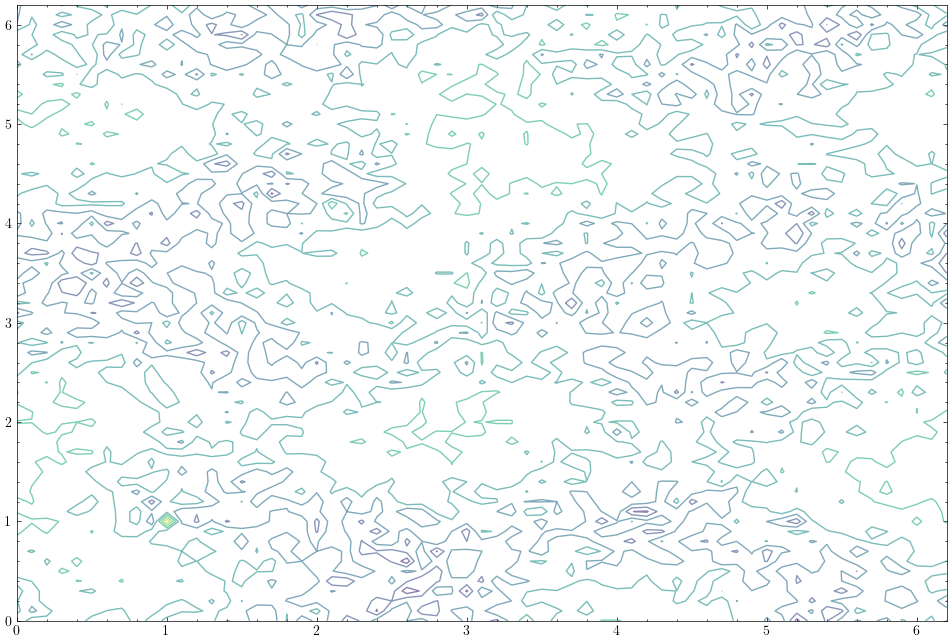

In [91]:
contour_plot("alpha_gw", "delta_gw")

### Small strains

Optimal likelihood is:  -35285.648569957564


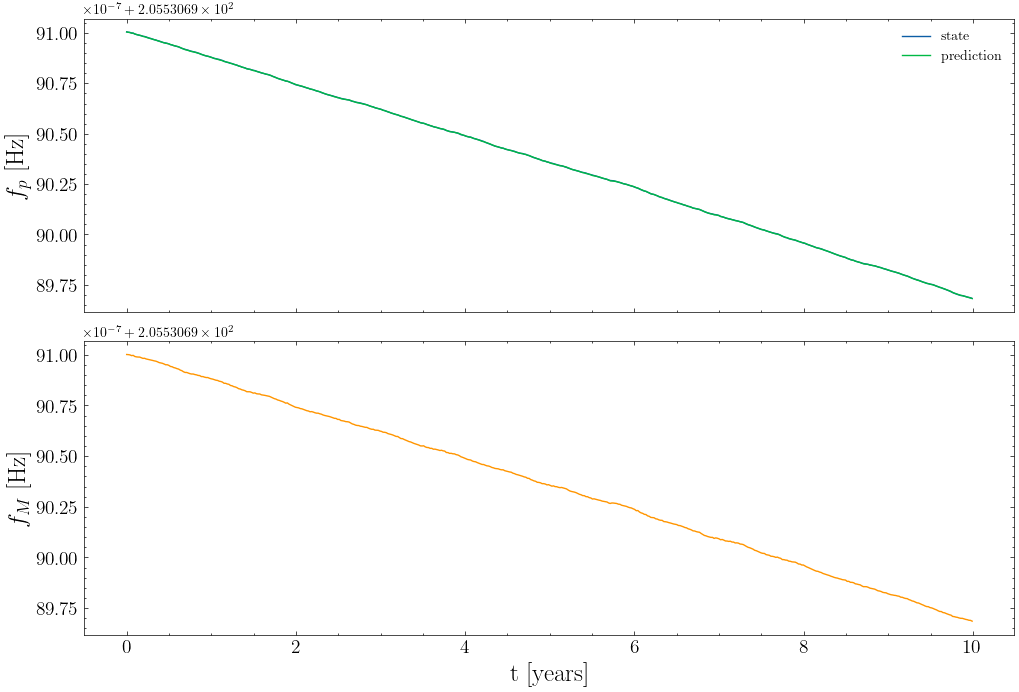

In [167]:
from plotting import likelihoods_over_priors,iterate_over_priors
import numpy as np 

#Set everything up
P   = SystemParameters(h=1e-12)   # define the system parameters 
PTA = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P)    # generate some synthetic data


#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions = KF.likelihood_and_states(true_parameters)
print("Optimal likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions, 1,savefig=None)


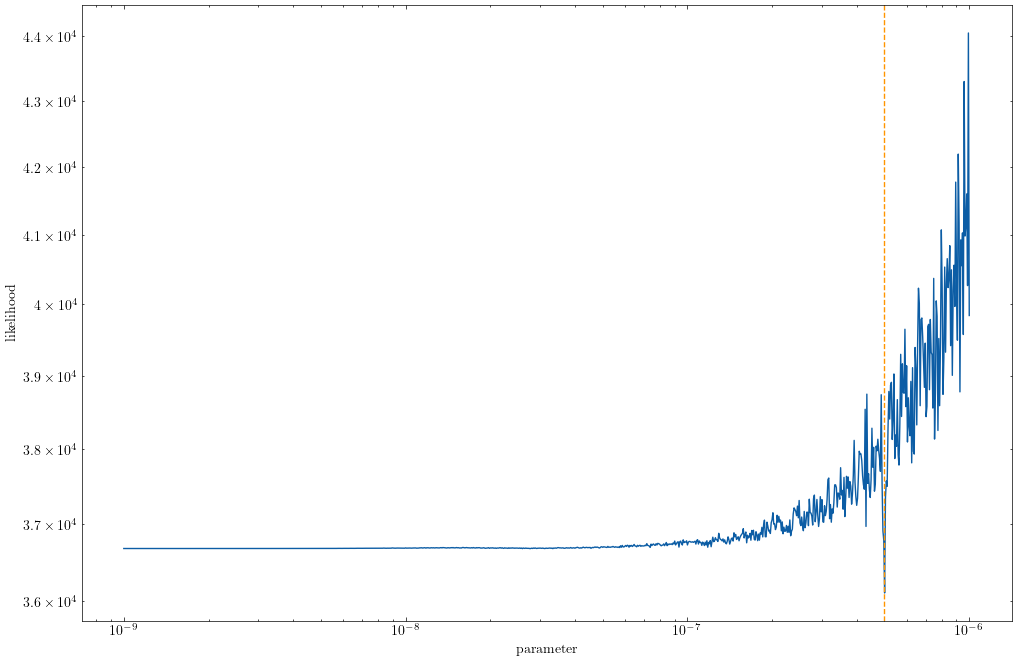

In [168]:
variable = "omega_gw"
variable_range = np.logspace(-9,-6,int(1e3))
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,true_parameters[variable])

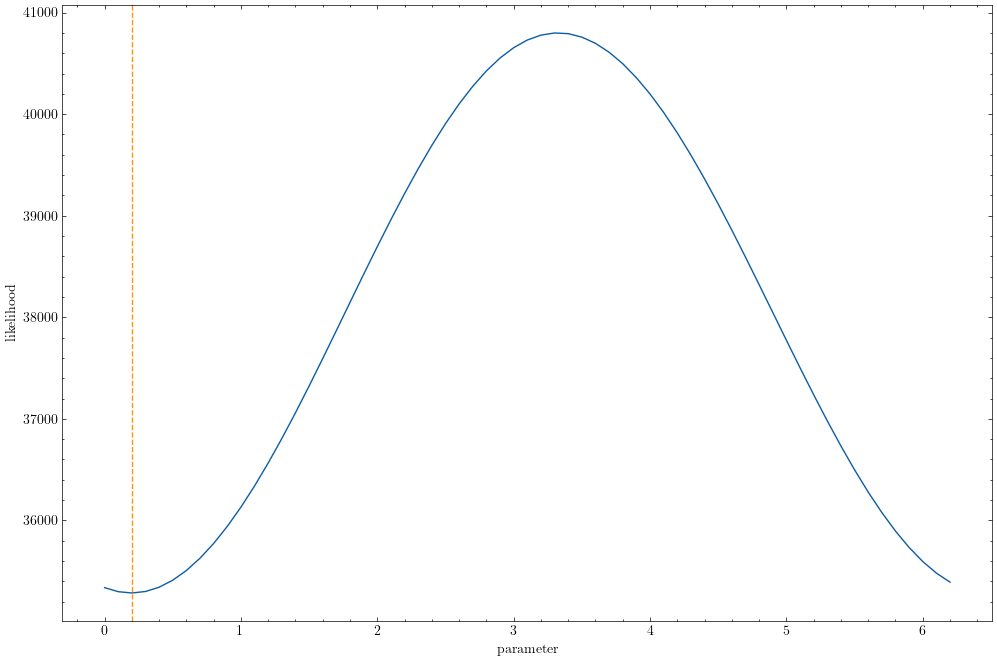

In [171]:
variable = "phi0_gw"
variable_range = np.arange(0,2*np.pi,0.1)
selected_parameters = true_parameters.copy()
likelihoods = iterate_over_priors(variable, variable_range,selected_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,true_parameters[variable])